In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
#Delclairing constants

TEAMNAME = "LogicGood"

In [7]:
df = pd.read_csv('traindata.csv')
df.head()

,rec_num,lfsstat,prov,cma,age_12,sex,marstat,educ,mjh,cowmain,...,paidot,unpaidot,xtrahrs,tenure,hrlyearn,union,permtemp,estsize,firmsize,efamtype
0,1,1,48,8,11,2,1,4,1,2,...,0.0,0.0,0.0,86,24.22,1,1,2,4,18
1,2,1,35,0,8,1,1,2,1,1,...,0.0,0.0,0.0,240,30.05,1,1,2,4,3
2,10,1,24,0,10,1,2,2,1,2,...,0.0,0.0,0.0,240,28.00,1,3,3,3,5
3,11,1,35,0,6,2,1,5,1,2,...,0.0,0.0,0.0,82,30.37,3,1,2,2,3
4,13,1,35,0,10,1,1,4,1,1,...,0.0,0.0,0.0,133,85.13,1,1,4,4,2


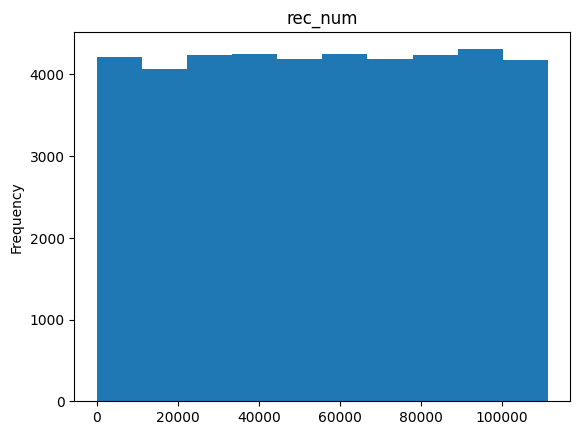

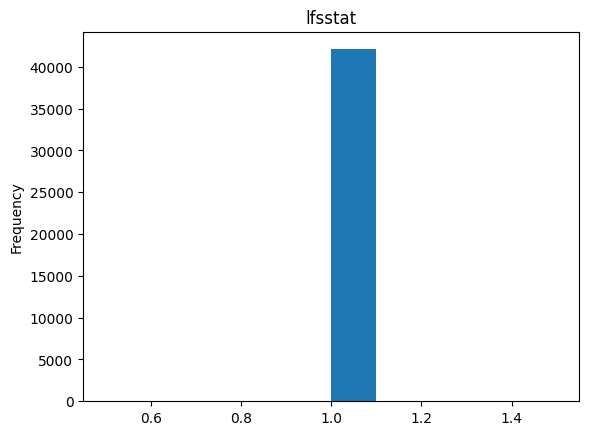

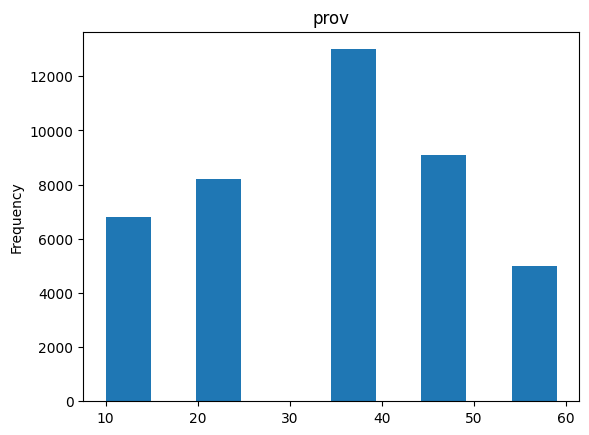

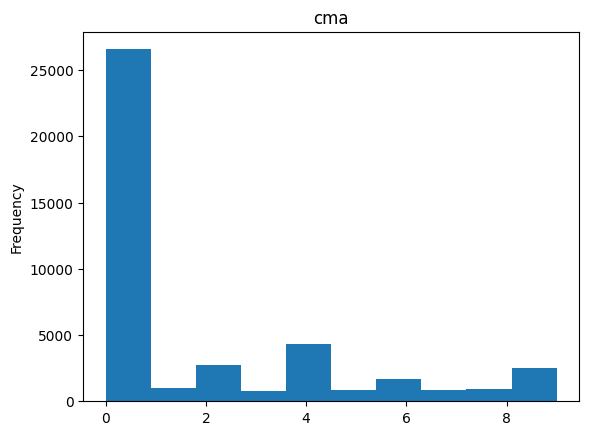

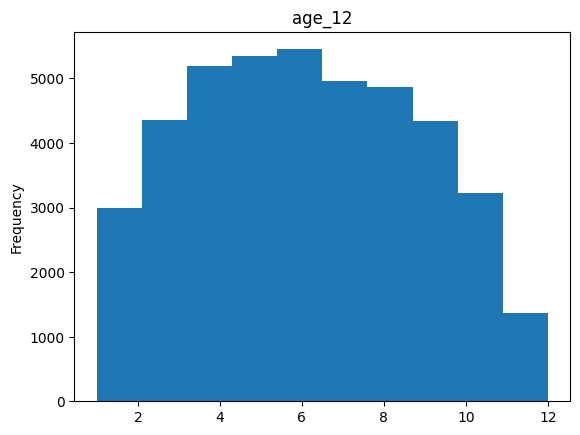

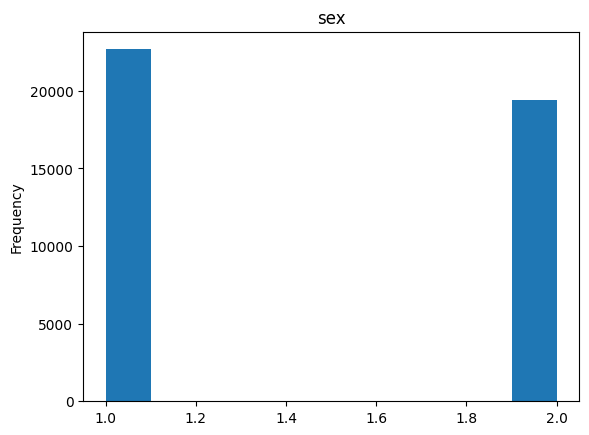

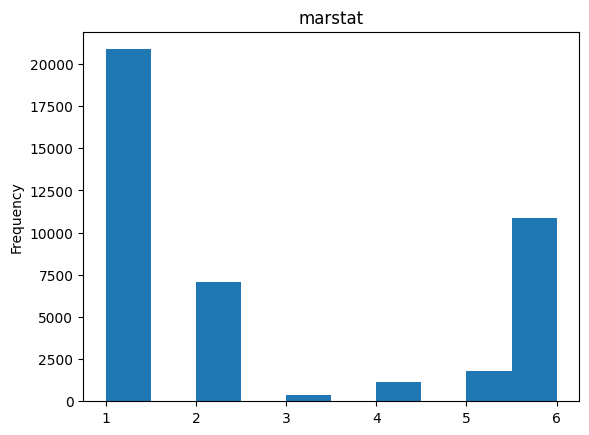

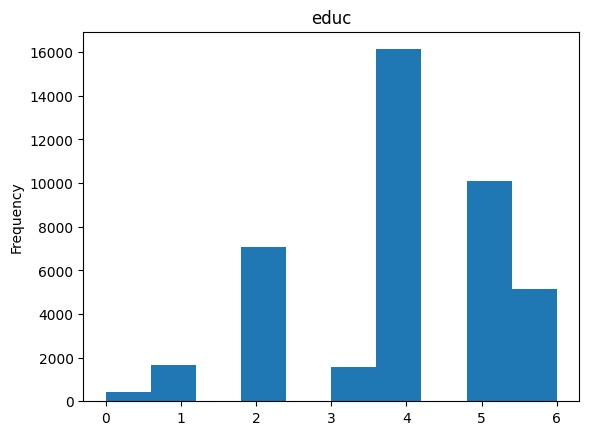

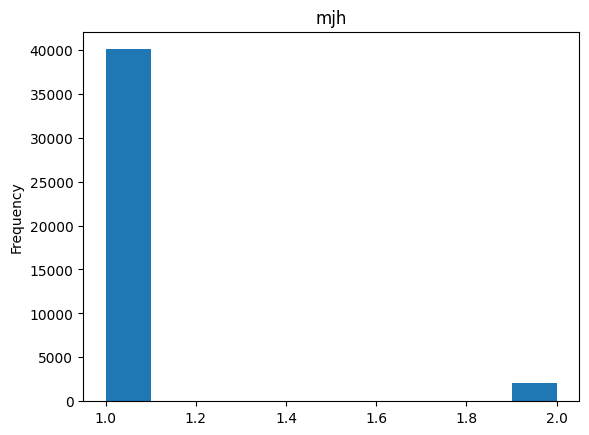

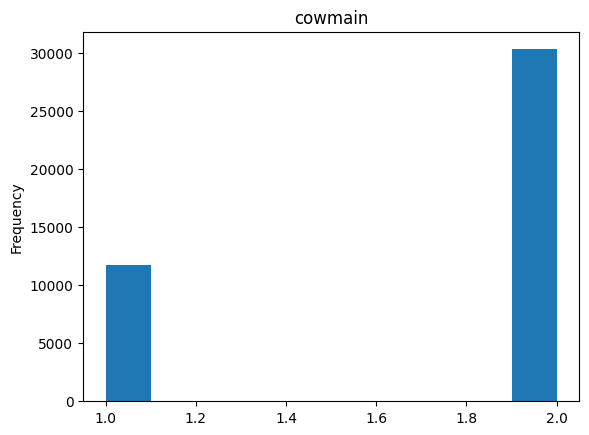

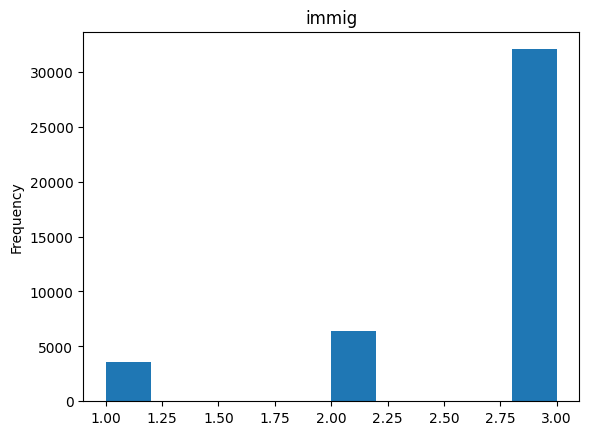

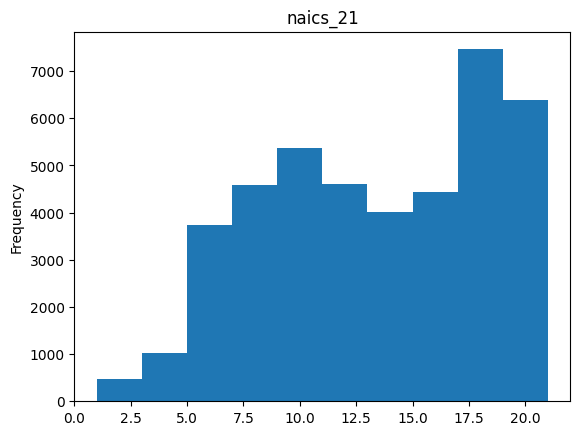

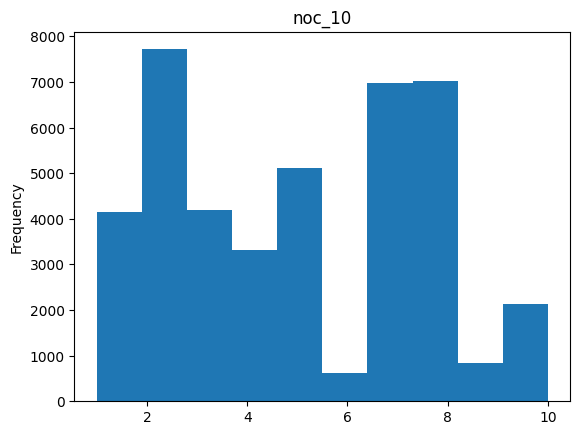

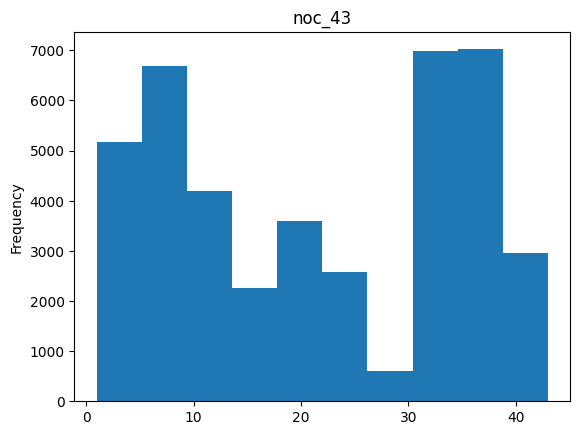

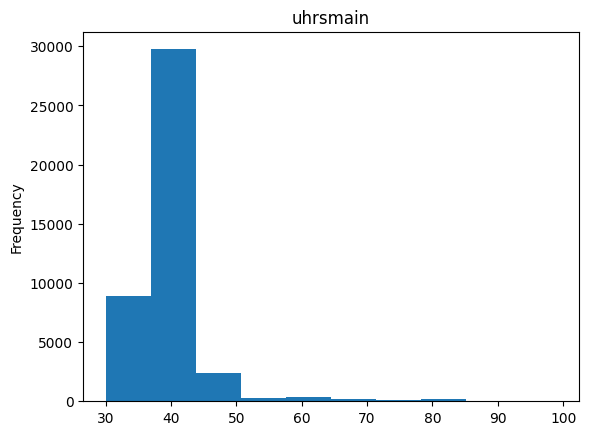

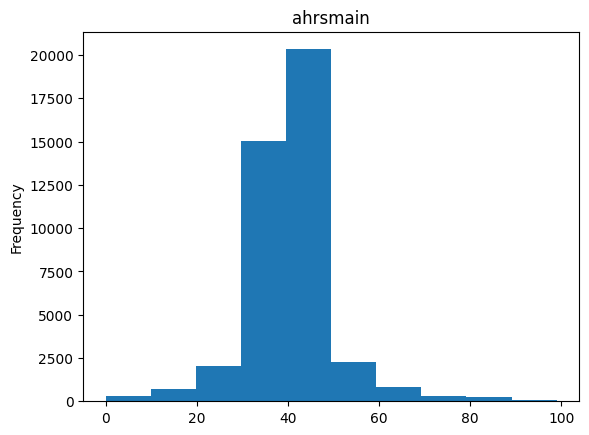

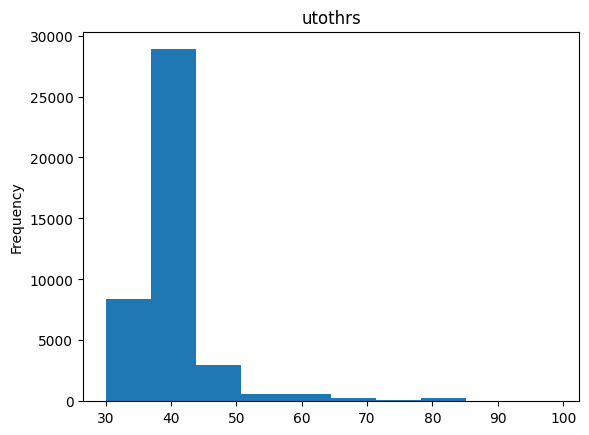

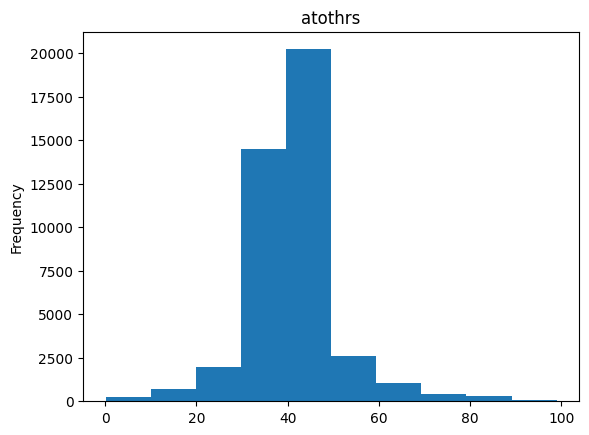

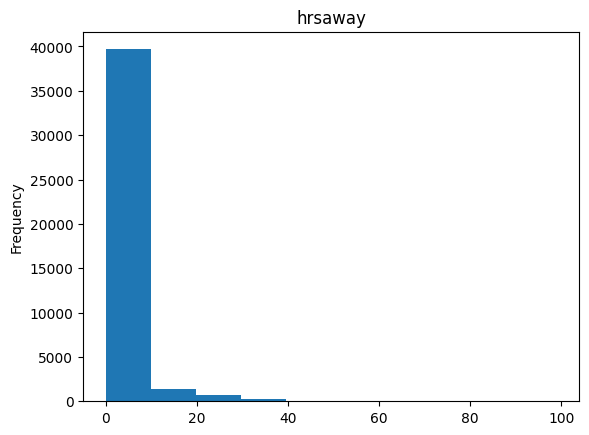

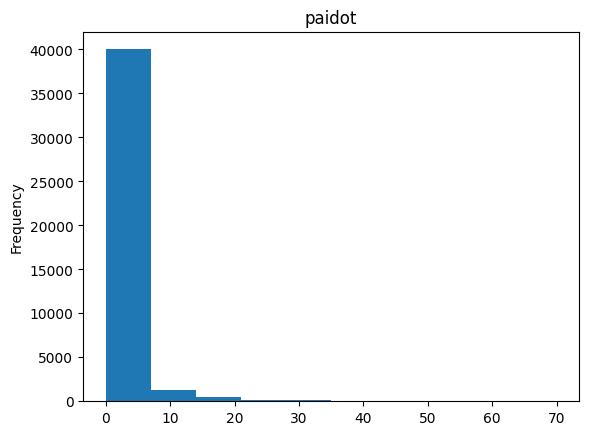

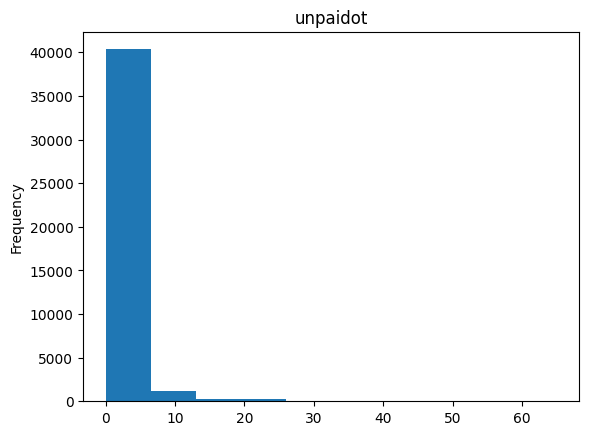

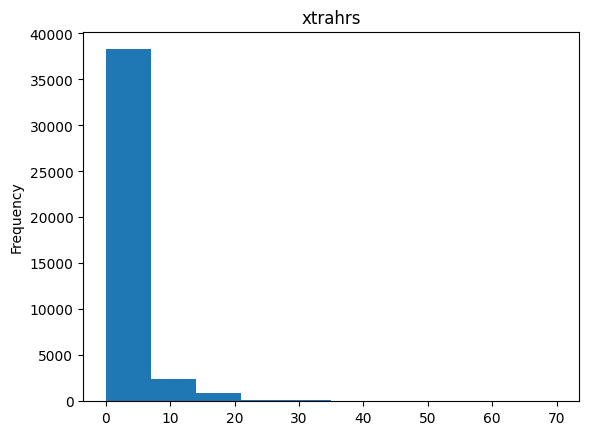

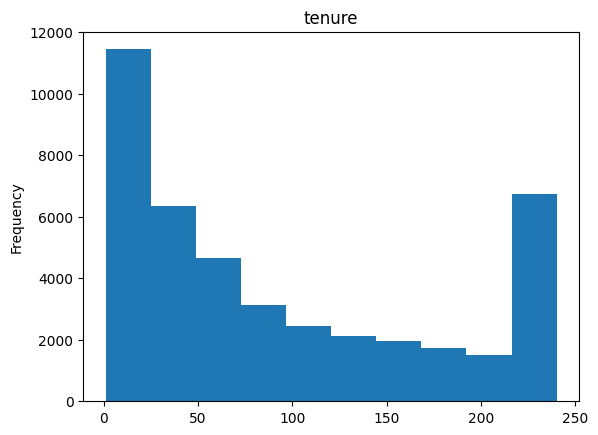

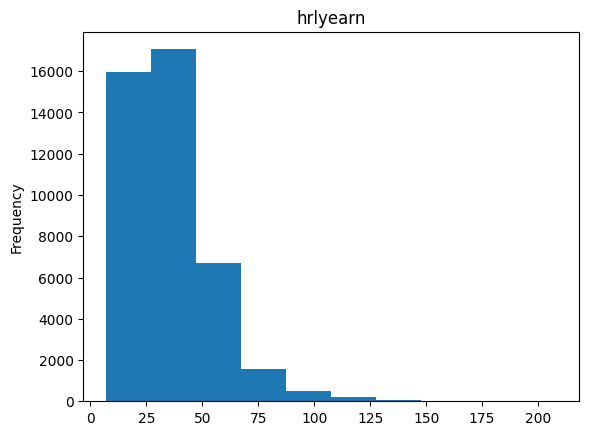

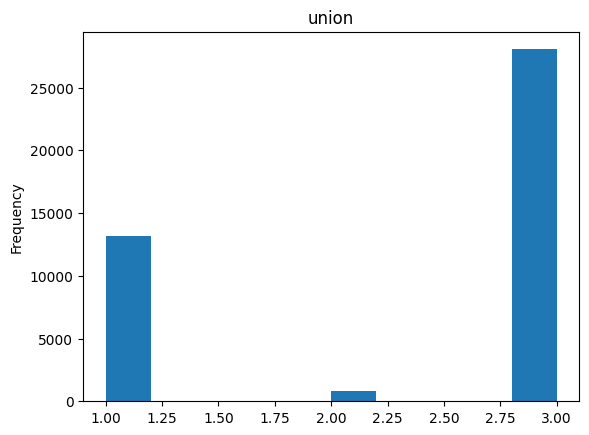

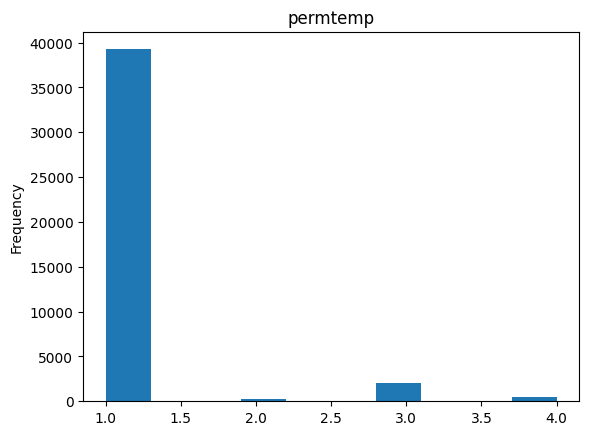

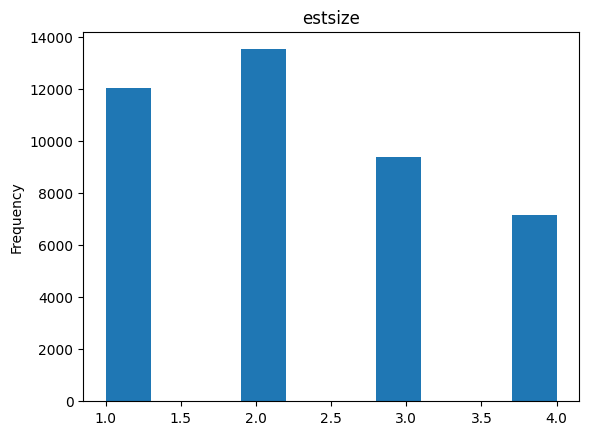

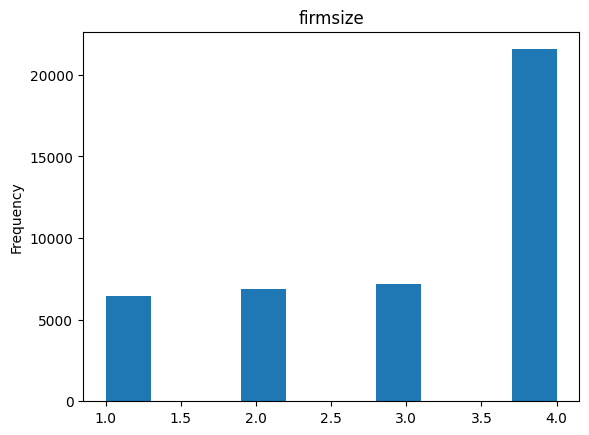

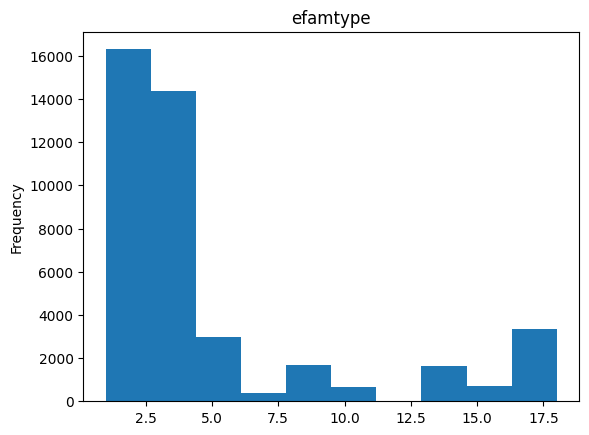

In [4]:
for column in df.columns:
    df[column].plot(kind='hist')
    plt.title(column)
    plt.show()


In [9]:
correlation_matrix = df.corr()
print(correlation_matrix)
correlation_matrix.to_csv('correlation_matrix.csv', index=False)


           rec_num  lfsstat      prov       cma    age_12       sex   marstat  \
rec_num   1.000000      NaN -0.001731  0.002763  0.001760 -0.000973 -0.000157   
lfsstat        NaN      NaN       NaN       NaN       NaN       NaN       NaN   
prov     -0.001731      NaN  1.000000  0.457805 -0.029655 -0.022570 -0.018227   
cma       0.002763      NaN  0.457805  1.000000  0.003567  0.001380 -0.004697   
age_12    0.001760      NaN -0.029655  0.003567  1.000000  0.015128 -0.345267   
sex      -0.000973      NaN -0.022570  0.001380  0.015128  1.000000  0.002395   
marstat  -0.000157      NaN -0.018227 -0.004697 -0.345267  0.002395  1.000000   
educ      0.002245      NaN -0.007012  0.105222 -0.040728  0.116068 -0.122352   
mjh      -0.005783      NaN  0.029758  0.009218 -0.024912  0.027762  0.009369   
cowmain  -0.001635      NaN  0.052772  0.051281 -0.061215 -0.188890  0.052674   
immig     0.000857      NaN -0.139089 -0.224374  0.020852 -0.004071  0.107912   
naics_21  0.000276      NaN 

In [ ]:
"""
Noteable correlations to potentially put in a PCA

hrsaway - atothrs (-0.460854995)
hrsaway - utohrs (-0.504499605)


"""

In [8]:
# Building an elastic net model
from numpy import mean
from numpy import std
from numpy import absolute
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import ElasticNet

# Set the target variable y as 'hrlyearn'
y = df['hrlyearn']

# Set the feature variables X as the rest of the columns in df
X = df.drop('hrlyearn', axis=1)

model = ElasticNet(alpha=1.0, l1_ratio=0.5)
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force scores to be positive
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (mean(scores), std(scores)))

# Fit the ElasticNet model
model.fit(X, y)


Mean MAE: 10.558 (0.161)


ElasticNet()

R-squared: 0.3251213729834549
RMSE: 15.103560555548038


/opt/anaconda3/envs/work/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


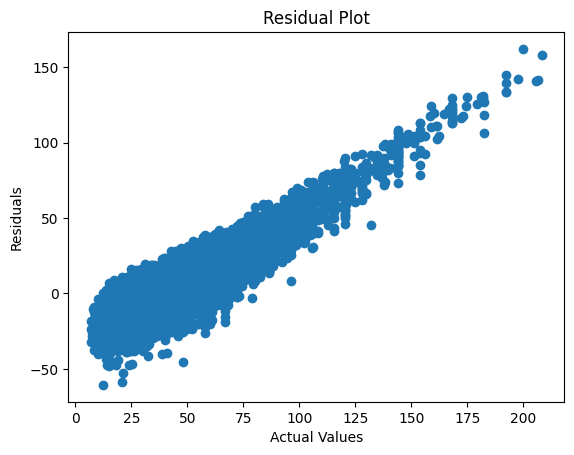

In [12]:
from sklearn.metrics import r2_score, mean_squared_error

# Calculate R-squared
r2 = r2_score(y, model.predict(X))
print(f"R-squared: {r2}")

# Calculate RMSE
rmse = mean_squared_error(y, model.predict(X), squared=False)
print(f"RMSE: {rmse}")

# Plot residuals
residuals = y - model.predict(X)
plt.scatter(y, residuals)
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


In [25]:
#This is what the coefficients are for the model
predictors = X.columns
coefficients = model.coef_

for predictor, coefficient in zip(predictors, coefficients):
    print(f"{predictor}: {coefficient}")


rec_num: -4.407771777785912e-06
lfsstat: 0.0
prov: 0.0990272038212228
cma: 0.07148037021997158
age_12: 0.12501648779952426
sex: -1.4587656956557729
marstat: -0.5284929848790951
educ: 2.1146499214102596
mjh: -0.0
cowmain: -0.0
immig: 0.41886810730667323
naics_21: -0.3703272579275127
noc_10: 0.7536792378036505
noc_43: -0.5767589549899969
uhrsmain: 0.1010875280866881
ahrsmain: 0.08133202939873388
utothrs: -0.07116289226065212
atothrs: -0.0
hrsaway: 0.07981490347692188
paidot: -0.0
unpaidot: 0.6719552142183322
xtrahrs: 0.11066002239030999
tenure: 0.03321076158209012
union: -0.0
permtemp: -0.0
estsize: 1.2990823466126928
firmsize: 0.767288732989605
efamtype: -0.12936188147768324


In [29]:
# Load the evaluation data
eval_df = pd.read_csv('evaldata.csv')

# Predict the hourly earnings for each row in the evaluation data
eval_df['phrlyearn'] = model.predict(eval_df)

# Display the updated evaluation data with the predicted hourly earnings
eval_df.head()


# Save the evaluation data with the predicted hourly earnings to a CSV file
eval_df[['rec_num', 'phrlyearn']].to_csv(f'{TEAMNAME}.csv', index=False)
